# Logistic regression

In this notebook, you will program a complete classifier based on logistic regression seen as a neural network. The different steps are quite similar across the  all the kinds of neural networks but with different complexity. We will start with the simpliest one.

## Logistic regresssion as a neural network

The logistic regression classifier can be seen as a simple neural network : 

<img src="https://kermorvant.github.io/csexed-ml/images/logistic_NN.png" style="width:650px" >

The weights are represented by the matrix W, the intercept by the bias b and the activation function is a sigmoid.

### Basic functions

First, we need to define 2 basic functions
* the sigmoid activation functions. 
* the initialization function for the W and b parameters. 

In this notebook, the skeleton of the functions are given, you have to fill the spaces where there is a comment #YOUR CODE HERE. To check that your code is correct, a test is provided after each function.

In [15]:
import numpy as np
from numpy.testing import *

In [147]:
# define the sigmoid function for activation
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    :param z: a scalar or numpy array 
    :returns: sigmoid(z)
    """

    s = 1/(1+np.exp(-z)) #YOUR CODE HERE
    
    return s

In [148]:
# Check that your code is correct on one example
test_result = sigmoid(np.array([0,2]))
assert_allclose(test_result,[0.5,0.880797])
print ("all is correct !")

all is correct !


In [149]:
def zero_initialize(dim):
    """
    Initialize w and b to 0

    :param dim: size of the vector w    
    :returs: w vector of zeros of size (dim, 1) and b = 0

    """
    w = np.zeros((dim,1)) #YOUR CODE HERE
    b = 0 #YOUR CODE HERE
    
    return w, b

In [150]:
# Check that your code is correct on one example
dim = 2
w, b = zero_initialize(dim)
assert(w.shape == (dim, 1))
assert(isinstance(b, float) or isinstance(b, int))
assert (b==0)
print ("all is correct !")

all is correct !


### Forward step

The forward step consist in computing the prediction of the network. This step is used both during the training and , when the training is done, when the netwok is used to make predictions. In the next function, we will compute both the output of the network and the gradient to update the parameters.

The activation is 
\begin{equation*}
A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})
\end{equation*}
The loss function on a sample i is : 
\begin{equation*}
L(\hat a^{(i)}, y^{(i)}) = - y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
\end{equation*}

The cost computed on m samples is 
\begin{equation*}
J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
\end{equation*}

The gradient for each parameter is : 
\begin{equation*}
\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}
\end{equation*}
\begin{equation*}
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}
\end{equation*}

In [292]:
def forward(w, b, X, Y):
    """
    Compute the forward propagation and compute cost and gradient

    
    :param w: weights, a numpy array of size (num_px * num_px * 3, 1)
    :param b: bias, a scalar
    :param X: data of size (num_px * num_px * 3, number of examples)
    :param Y: the target vector of size (1, number of examples)

    :returns:
    cost: negative log-likelihood cost for logistic regression
    dw: gradient of the loss with respect to w, thus same shape as w
    db: gradient of the loss with respect to b, thus same shape as b
 
    """

    m = X.shape[1]
    
    # Compute activation
    A = sigmoid((w.T).dot(X)+b) #YOUR CODE HERE
    
    # Compute the cost
    cost = -1/m*np.sum(np.multiply(Y,np.log(A))+ np.multiply((1-Y),(np.log(1-A)))) #YOUR CODE HERE
    
    # Compute derivative for gradient computation
    dw = 1/m*X.dot((A-Y).T) #YOUR CODE HERE
    db = 1/m*np.sum(A-Y) #YOUR CODE HERE

    grads = {"dw": dw,"db": db}
    
    return grads, cost

In [293]:
# Check that your code is correct on one example
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = forward(w, b, X, Y)
assert(grads["dw"].shape == w.shape)
assert(grads["db"].dtype == float)
cost = np.squeeze(cost)
assert(cost.shape == ())
assert_allclose(grads["dw"],[[0.99845601],[2.39507239]])
assert_equal(grads["db"],0.001455578136784208)
assert_equal(cost,5.801545319394553)
print ("all is correct !")

all is correct !


### Training step

During the training phase, after each forward step the parameters are updated according to the gradient. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [281]:
def train(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    :param w: weights, a numpy array of size (num_px * num_px * 3, 1)
    :param b: bias, a scalar
    :param X: data of shape (num_px * num_px * 3, number of examples)
    :param Y: target vector  of shape (1, number of examples)
    :param num_iterations:  number of iterations of the optimization loop
    :param learning_rate:  learning rate of the gradient descent update rule
    
    returns:
    params: dictionary containing the weights w and bias b
    grads: dictionary containing the gradients of the weights and bias with respect to the cost function
    costs: list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    for i in range(num_iterations):
        
        # Compute gradient  and cost
        grads, cost = forward(w, b, X, Y)
 
        # Get derivatives for the parameters
        dw = grads["dw"]
        db = grads["db"]
        
        # Update the parameters
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Store the costs
        if i % 100 == 0:
            costs.append(cost)
            print (cost)
            print ("Cost after iteration %i: %f" %(i, cost))
        
    params = {"w": w,"b": b}
    grads = {"dw": dw,"db": db}
    
    return params, grads, costs

In [282]:
params, grads, costs = train(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)
assert_almost_equal(costs[0],5.801545319394553)
assert_allclose(params["w"],[[0.19033591],[0.12259159]])
assert_almost_equal(params["b"],1.9253598300845747)
assert_allclose(grads["dw"],[[0.67752042], [1.41625495]])
assert_almost_equal(grads["db"],0.21919450454067652)
print ("all is correct !")

0.8077356337712416
Cost after iteration 0: 0.807736


AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 0.8077356337712416
 DESIRED: 5.801545319394553

### Class prediction on the dataset

Now that you have trained the parameters w and b, you can use them  to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Compute the activation $\hat{Y} = A = \sigma(w^T X + b)$
2. Convert the activation into classes according to a threshold : class 0 if activation <= 0.5 and class 1 if activation > 0.5
3. stores the predictions into a vector `Y_prediction`. 

In [283]:
# GRADED FUNCTION: predict

def decide(v):
    #YOUR CODE HERE
    if v> 0.5:
        return 1
    else:
        return 0
    
vdecide = np.vectorize(decide)

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    
    :params w: weights, a numpy array of size (num_px * num_px * 3, 1)
    :params b: bias, a scalar
    :params X: data of size (num_px * num_px * 3, number of examples)
    
    :returns: Y_prediction: a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of the target
    A = sigmoid(w.T.dot(X)+b) #YOUR CODE HERE
    
    # Convert the probability into class using the decide function
    for i in range(A.shape[1]):
        Y_prediction = vdecide(A) #YOUR CODE HERE
    
    
    return Y_prediction

In [156]:

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
Y_prediction = predict(w, b, X)
assert(Y_prediction.shape == (1, X.shape[1]))
assert_allclose(Y_prediction,[[1,1,0]])
print ("all is correct !")

all is correct !


### The full story

A complete experiment is composed of both the training and evaluation phases. Write the function  `train_test()` :
* train the network
* predict on the test set
* predict on the train set 
* compute the accuracies

In [157]:
def train_test(X_train, Y_train, X_test, Y_test, num_iterations = 200, learning_rate = 0.5):
    """
    Train and evaluate a logistic regression model
    
    Arguments:
    :params X_train: training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    :params Y_train: training set tagets represented by a numpy array (vector) of shape (1, m_train)
    :params X_test: test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    :params Y_test: test labels represented by a numpy array (vector) of shape (1, m_test)
    :params num_iterations:  number of training iterations (hyperparameter)
    :params learning_rate: learning rate (hyperparameter)
    
    :returns: d: dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    dim = X_train.shape[0]
    w, b = zero_initialize(dim)

    # Train with gradient descent 
    parameters, grads, costs = train(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Get trained parameters
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Experiment on binary MNIST 
The MNIST dataset is a standard dataset to test classification algorithms. It is composed of isolated digits on 28x28 pixels gray scale images. 

<img src="https://kermorvant.github.io/csexed-ml/dataiku/images/MnistExamples.png" style="width:650px" >


A version of the MNIST dataset is available here : http://data.teklia.com/csexed/MNIST_all_features.csv.gz
In this version, the images have been reduced to 8x8 pixels.

Execute the following cells to get the data and prepare the dataset

In [304]:
import pandas as pd
# Read the dataset
url="http://data.teklia.com/csexed/MNIST_all_features.csv.gz"
#df = pd.read_csv("../data/MNIST_all_features.csv")
df = pd.read_csv(url)
# Select only 2 classes
df_binary = df[(df['class']==1) | (df['class']==7)]
# Select only a few examples
df_train = df_binary[:800]
df_test = df_binary[800:1000]

In [309]:
# Convert the target to numpy and convert to 0/1
train_set_y = np.reshape(np.array(df_train['class'].replace(7,0)),(1,-1))
test_set_y = np.reshape(np.array(df_test['class'].replace(7,0)),(1,-1))
# Select only features (drop the class), transpose and normalize in 0..1
train_set_x = df_train.drop('class',axis=1).transpose().divide(255.).as_matrix()
test_set_x = df_test.drop('class',axis=1).transpose().divide(255.).as_matrix()
print ("train_y:",train_set_y.shape,"test_y:",test_set_y.shape,"train_x:",train_set_x.shape,"test_x:",test_set_x.shape)
print ()
print ()
print ()

train_y: (1, 800) test_y: (1, 200) train_x: (64, 800) test_x: (64, 200)





Use your implementation of logistic regression to classify 2 classes of digits from MNIST. In the next cell, you can display the images and you prediction results. Change the number of iteration, of samples, the classes, etc.

In [310]:
d = train_test(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10, learning_rate = 0.001)

0.6931471805599452
Cost after iteration 0: 0.693147
train accuracy: 90.25 %
test accuracy: 92.0 %


index 0 target = 1 predicted = 1.000000
index 1 target = 0 predicted = 0.000000
index 2 target = 1 predicted = 1.000000
index 3 target = 1 predicted = 1.000000
index 4 target = 0 predicted = 0.000000
index 5 target = 1 predicted = 1.000000
index 6 target = 0 predicted = 0.000000
index 7 target = 0 predicted = 0.000000
index 8 target = 1 predicted = 1.000000
index 9 target = 1 predicted = 1.000000
index 10 target = 0 predicted = 0.000000
index 11 target = 0 predicted = 0.000000
index 12 target = 0 predicted = 0.000000
index 13 target = 0 predicted = 0.000000
index 14 target = 1 predicted = 1.000000
index 15 target = 1 predicted = 1.000000
index 16 target = 0 predicted = 0.000000
index 17 target = 1 predicted = 1.000000
index 18 target = 1 predicted = 1.000000
index 19 target = 0 predicted = 0.000000


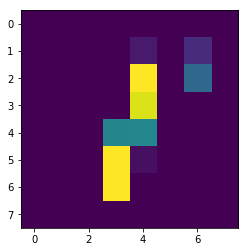

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline

# Example of a picture that was wrongly classified.
for index in range (20):
    
    print ("index %i target = %s predicted = %f" %(index,str(test_set_y[0,index]),d["Y_prediction_test"][0,index]))
    
index = 14
plt.imshow(test_set_x[:,index].reshape((8, 8, )))